Running a simulation with SHyFT
=========

### This notebook is guiding through the simulation process of a catchment. The following steps are described in detail:
1. **Configuration of a SHyFT simulation run**
2. **Running a SHyFT simulation**
3. **Post-processing:** Fetching simulation results from the simulator-object.

<i>© Felix Matt, University of Oslo</i>

In [14]:
# python modules we use
%pylab inline
import os
import sys
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [15]:
# setting up the environment
shyft_path = os.path.abspath(os.path.realpath('../hycamp/software/shyft_course_2/shyft'))
sys.path.append(shyft_path)

In [16]:
from os import path
import unittest

In [17]:
from shyft import shyftdata_dir
from shyft.repository.default_state_repository import DefaultStateRepository
from shyft.orchestration.configuration import yaml_configs
from shyft.orchestration.simulators.config_simulator import ConfigSimulator
from shyft import api

In [18]:
# Set up configuration
config_dir = "/geo/nunatak/hycamp/software/shyft_course_2/shyft/shyft/tests/netcdf"
cfg = yaml_configs.YAMLConfig("neanidelva_simulation.yaml", "neanidelva",config_dir=config_dir, data_dir=shyftdata_dir)

In [19]:
# get a simulator
simulator = ConfigSimulator(cfg)
n_cells = simulator.region_model.size()
state_repos = DefaultStateRepository(cfg.model_t, n_cells)

In [20]:
# run the simulation
simulator.run(cfg.time_axis, state_repos.get_state(0))


time
series_name
x
y
z
crs
precipitation
time
series_name
x
y
z
crs
temperature
time
series_name
x
y
z
crs
wind_speed
time
series_name
x
y
z
crs
relative_humidity
time
series_name
x
y
z
crs
global_radiation


In [21]:
# Get the discharge for each catchment
discharge_ts = []
for catch in range(len(simulator.region_model.catchment_id_map)):
    dis = simulator.region_model.statistics.discharge(api.IntVector(catch))
    ts=[dis.value(t) for t in range(dis.size())]
    discharge_ts.append(ts)

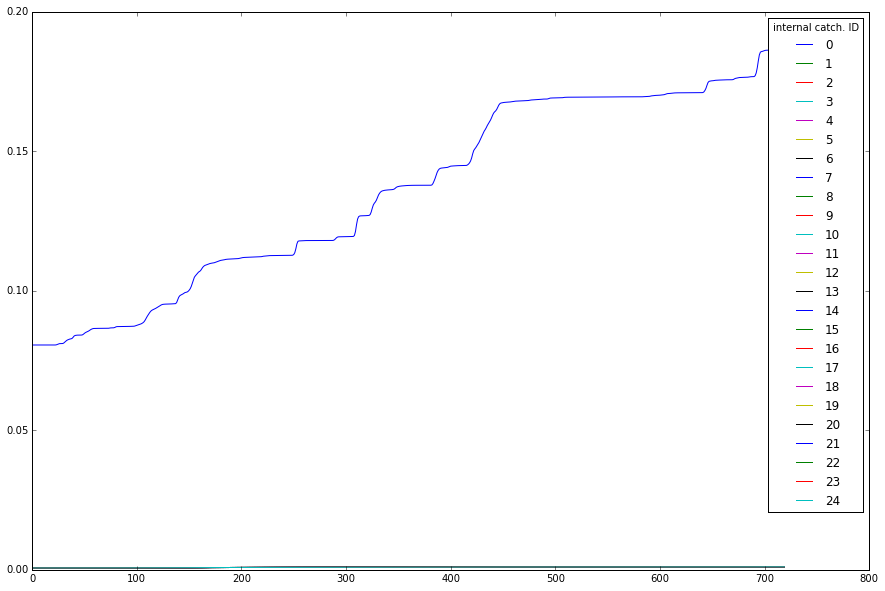

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
for i,vals in enumerate(discharge_ts):
    ax.plot(vals, label = str(i))
ax.legend(title='internal catch. ID')

##Exercise: Get the snow covered area of each cell for the last time step and use a scatter plot to visualize it.